In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('amcat.csv') 

In [3]:
df.head(2)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


## Introduction of data

In [4]:
df.shape

(3998, 39)

In [5]:
df.size

155922

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [8]:
df.duplicated().sum()

0

## Data Types And Fixing the type of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [10]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

C:\Users\Dixit Negi\AppData\Local\Temp\ipykernel_15412\1267054188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])


In [11]:
df['DOB'] = pd.to_datetime(df['DOB'])

C:\Users\Dixit Negi\AppData\Local\Temp\ipykernel_15412\1662918849.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [12]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [13]:
df['Unnamed: 0'].unique()

array(['train'], dtype=object)

In [14]:
df=df.drop('Unnamed: 0',axis=1)

In [15]:
df['Salary'] = df['Salary'].astype(int)

## Univariate Analysis 

In [16]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [17]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]

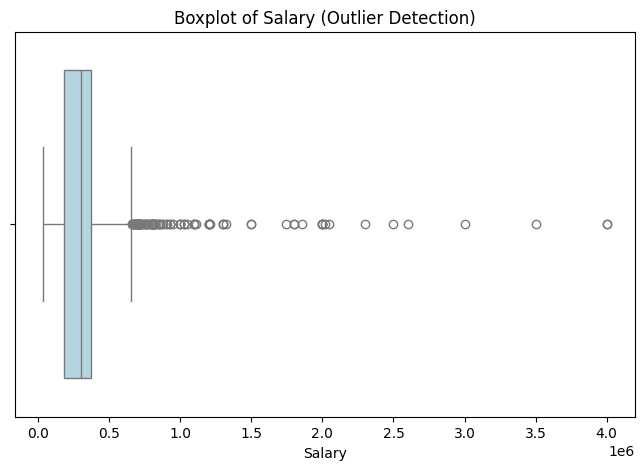

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary'], color='lightblue')
plt.title('Boxplot of Salary (Outlier Detection)')
plt.show()

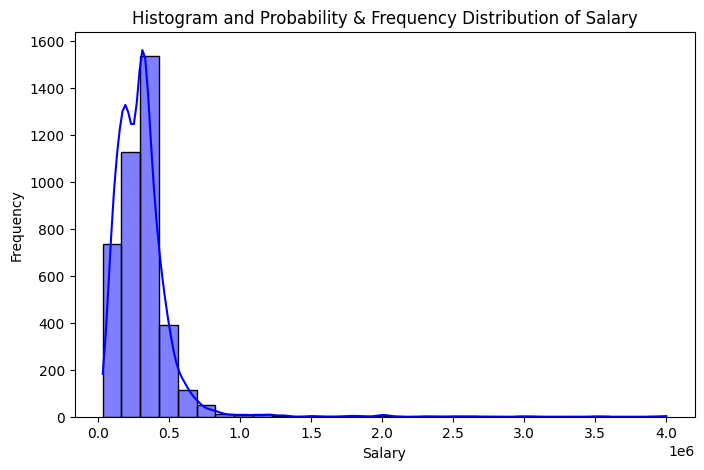

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=30, kde=True, color='blue')
plt.title('Histogram and Probability & Frequency Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


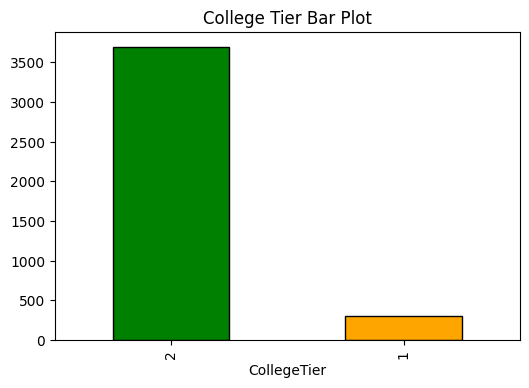

In [20]:
plt.figure(figsize=(6, 4))
df['CollegeTier'].value_counts().plot(kind='bar', color=['green', 'orange'], edgecolor='black')
plt.title('College Tier Bar Plot')
plt.show()

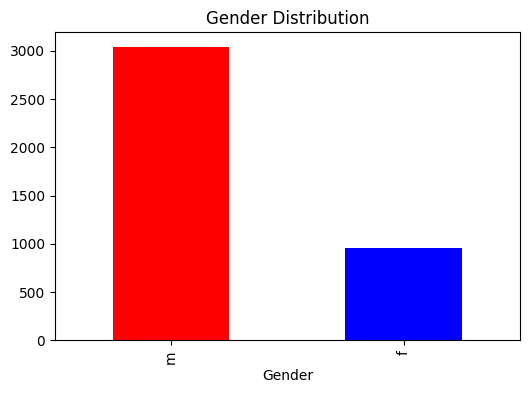

In [21]:
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Gender Distribution')
plt.show()

C:\Users\Dixit Negi\AppData\Local\Temp\ipykernel_15412\4189981059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Degree', data=df, palette='coolwarm', order=df['Degree'].value_counts().index ,edgecolor='black')


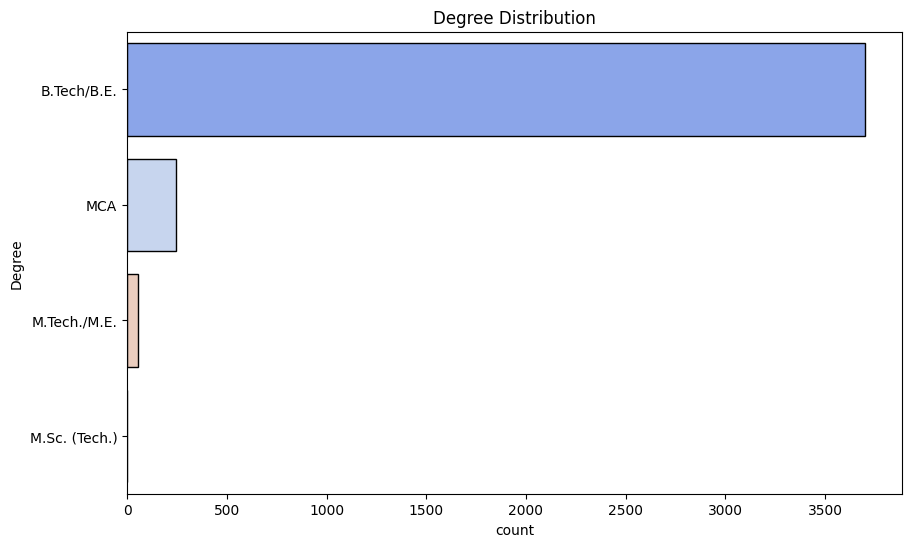

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Degree', data=df, palette='coolwarm', order=df['Degree'].value_counts().index ,edgecolor='black')
plt.title('Degree Distribution')
plt.show()

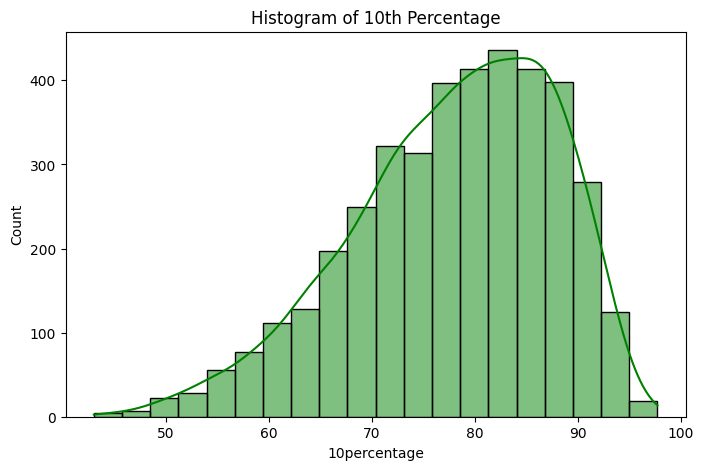

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['10percentage'], bins=20, kde=True, color='green')
plt.title('Histogram of 10th Percentage')
plt.show()

In [24]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [25]:
df['Designation'].nunique()

419

In [26]:
df['Designation'].value_counts()

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

In [27]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

## Bivariate Analysis

In [28]:
correlation_matrix = df[['Salary', 'collegeGPA', '10percentage', '12percentage']].corr(method='pearson')

In [29]:
correlation_matrix

,Salary,collegeGPA,10percentage,12percentage
Salary,1.000000,0.130103,0.177373,0.170254
collegeGPA,0.130103,1.000000,0.312538,0.346137
10percentage,0.177373,0.312538,1.000000,0.643378
12percentage,0.170254,0.346137,0.643378,1.000000


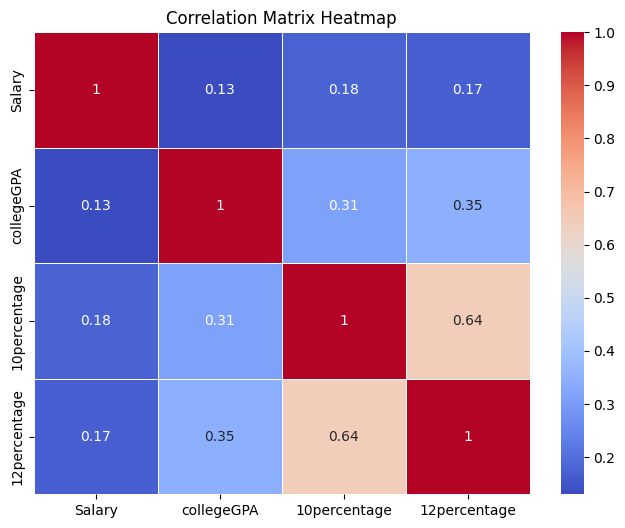

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
pivot_data = df.pivot_table(values='Salary', index='Gender', columns='Designation', aggfunc='mean')

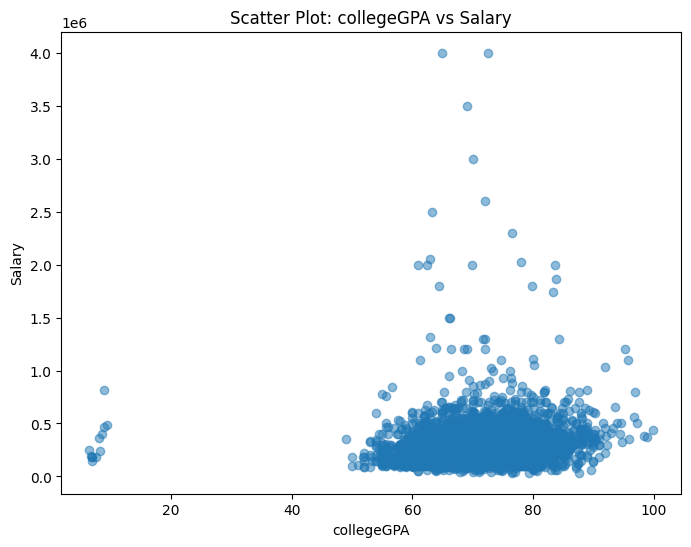

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5)
plt.title('Scatter Plot: collegeGPA vs Salary')
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.show()

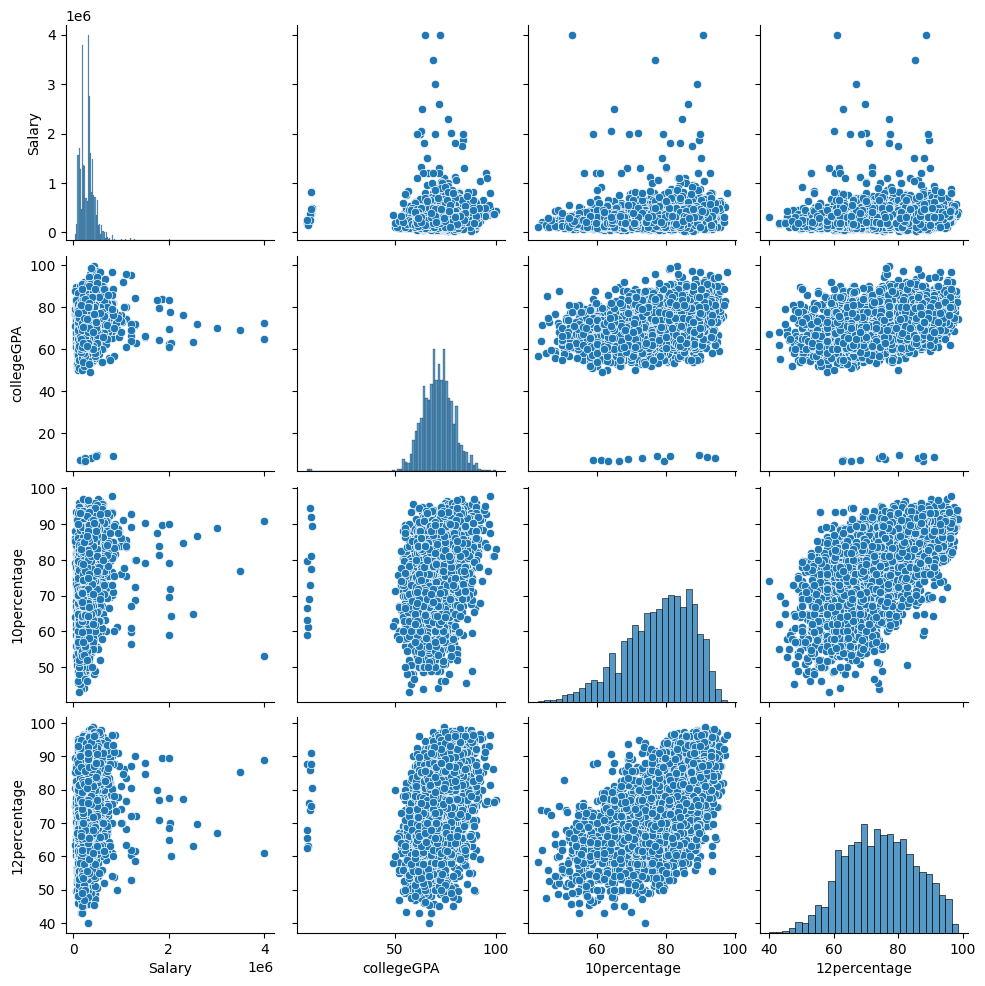

In [33]:
sns.pairplot(df[['Salary', 'collegeGPA', '10percentage', '12percentage']])
plt.show()

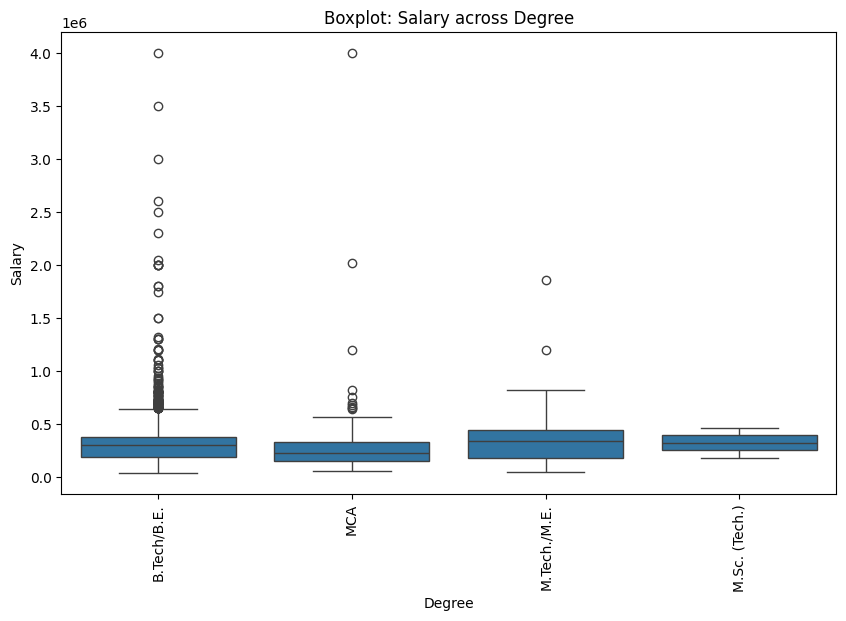

In [34]:
# Example: Boxplot for Salary across different Job Cities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=df)
plt.title('Boxplot: Salary across Degree')
plt.xticks(rotation=90)
plt.show()

In [35]:
mean_salary = df[['Salary', 'Gender']].groupby('Gender').mean()
median_salary = df[['Salary', 'Gender']].groupby('Gender').median()
salary_stats = pd.DataFrame({
    'Mean Salary': mean_salary['Salary'],
    'Median Salary': median_salary['Salary']
})

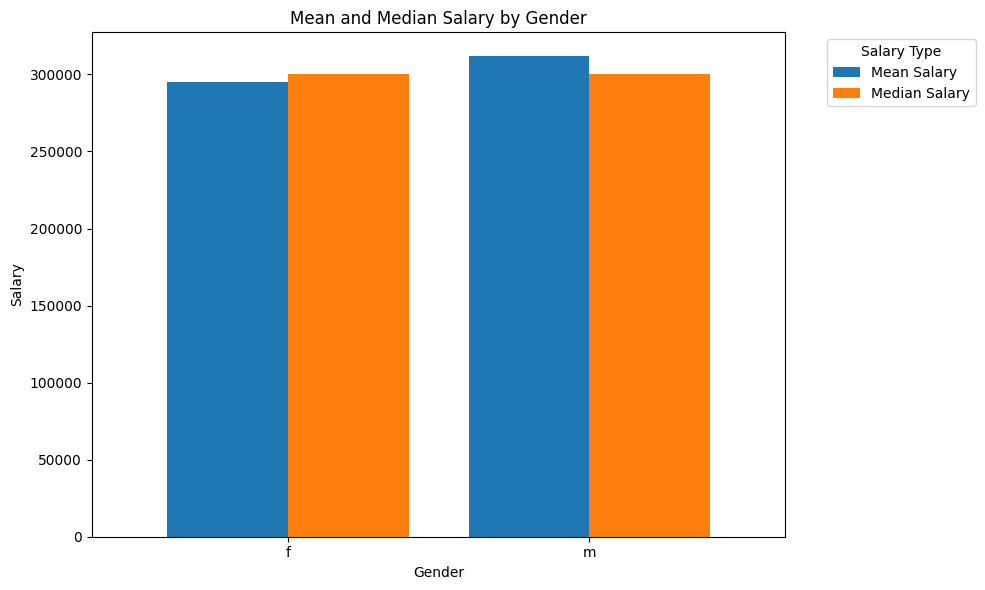

In [36]:
salary_stats.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Mean and Median Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.legend(title='Salary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
mean_values = df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

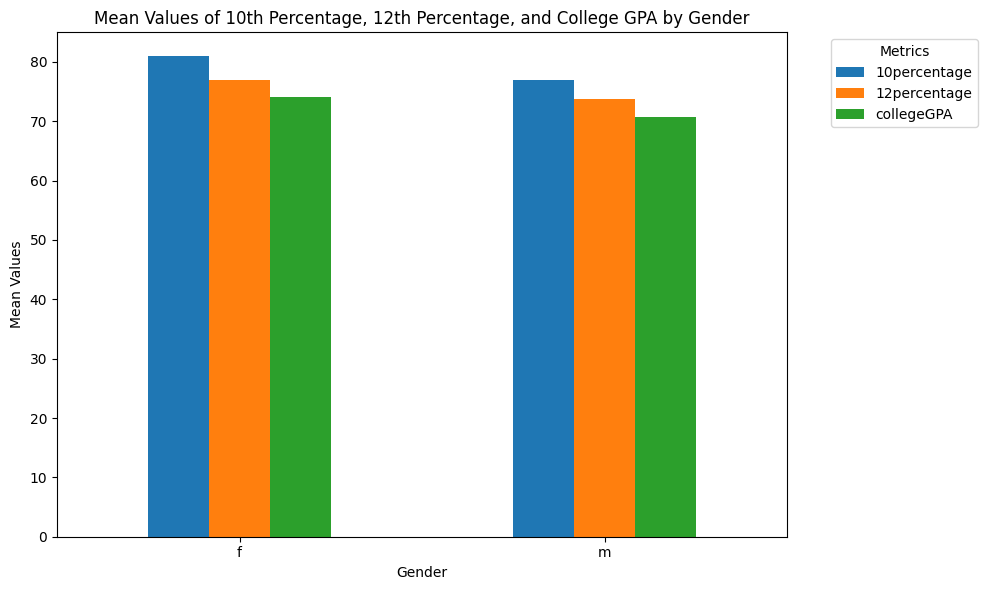

In [38]:
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of 10th Percentage, 12th Percentage, and College GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

In [39]:
pivot = df.pivot_table(values='Salary', index='Degree', columns='Gender', aggfunc='mean')

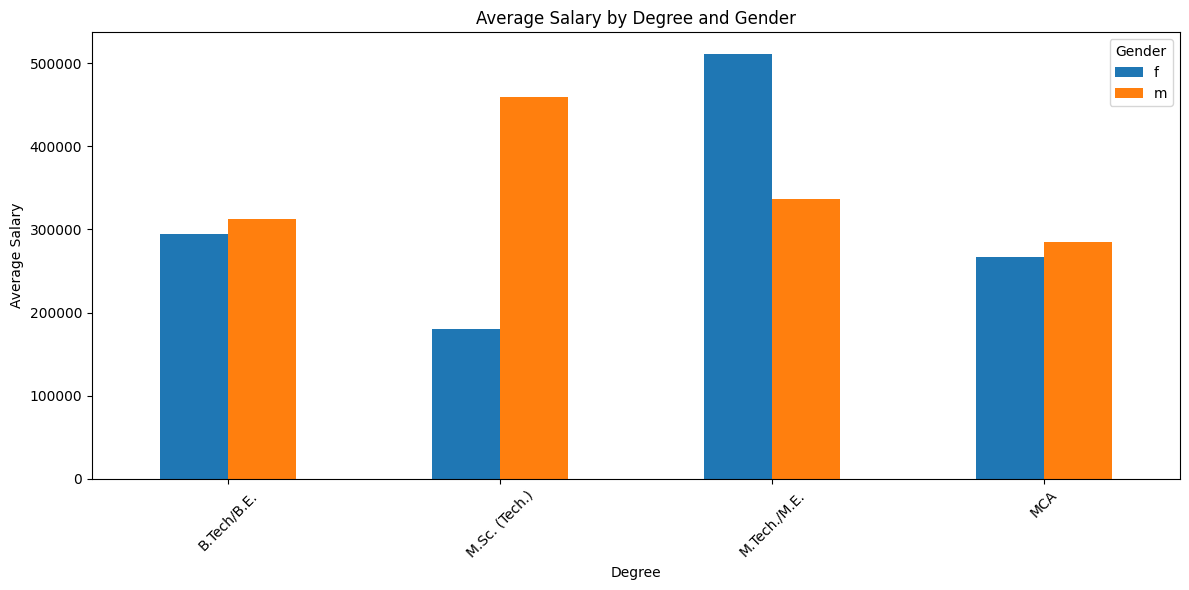

In [40]:
pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Average Salary by Degree and Gender')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  
plt.legend(title='Gender')
plt.tight_layout()  
plt.show()

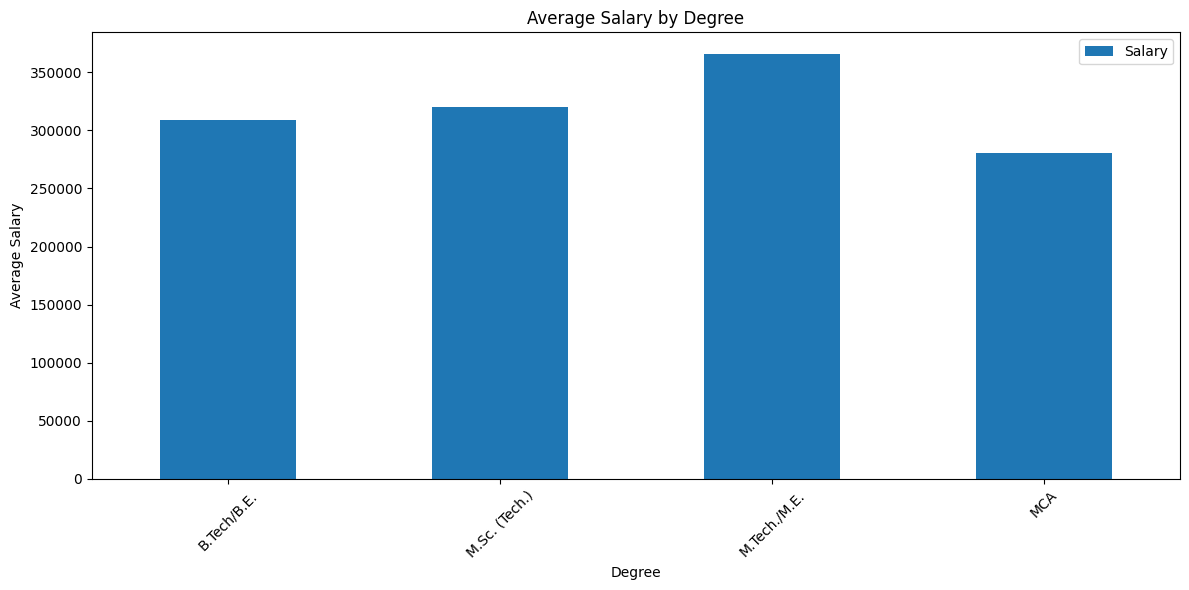

In [41]:
pivot = df.pivot_table(values='Salary', index='Degree', aggfunc='mean')
max_salary = pivot['Salary'].max()  
highest_salary_degree = pivot[pivot['Salary'] == max_salary].index[0] 
pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Average Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
crosstab_degree_gender = pd.crosstab(df['Gender'], df['Degree'])

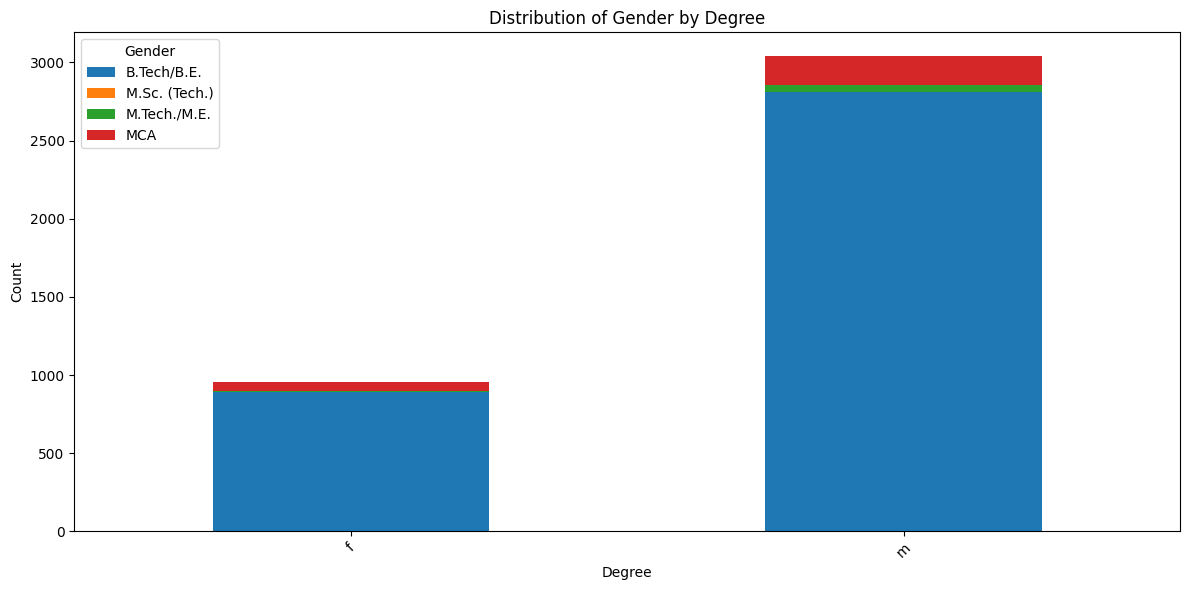

In [43]:
crosstab_degree_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Gender by Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Gender')
plt.tight_layout()  
plt.show()

## Research Questions

In [44]:
job_titles = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(job_titles)]
average_salaries = filtered_df.groupby('Designation')['Salary'].mean().reset_index()
salary_range = (250000, 300000)

C:\Users\Dixit Negi\AppData\Local\Temp\ipykernel_15412\1904657160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_salaries, x='Designation', y='Salary', palette='viridis')


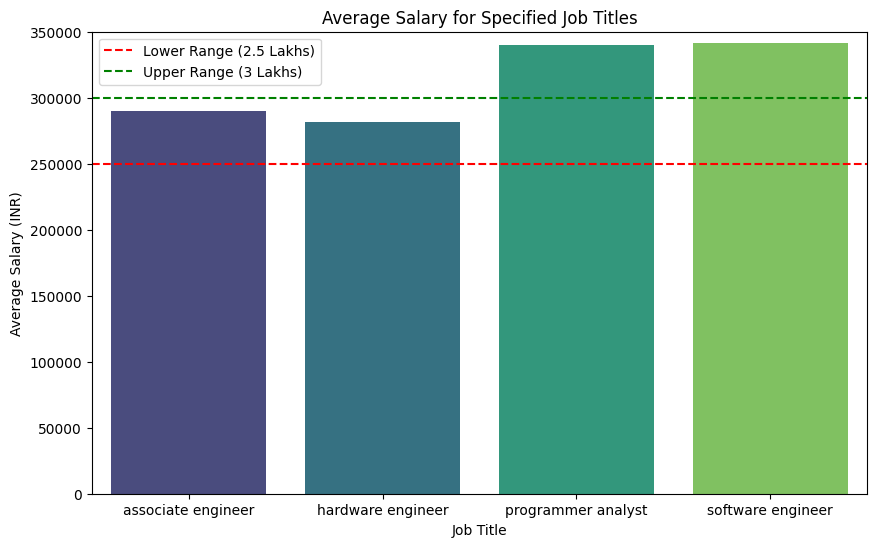

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_salaries, x='Designation', y='Salary', palette='viridis')
plt.axhline(y=salary_range[0], color='r', linestyle='--', label='Lower Range (2.5 Lakhs)')
plt.axhline(y=salary_range[1], color='g', linestyle='--', label='Upper Range (3 Lakhs)')
plt.title('Average Salary for Specified Job Titles')
plt.ylabel('Average Salary (INR)')
plt.xlabel('Job Title')
plt.legend()
plt.ylim(0, 350000)
plt.show()

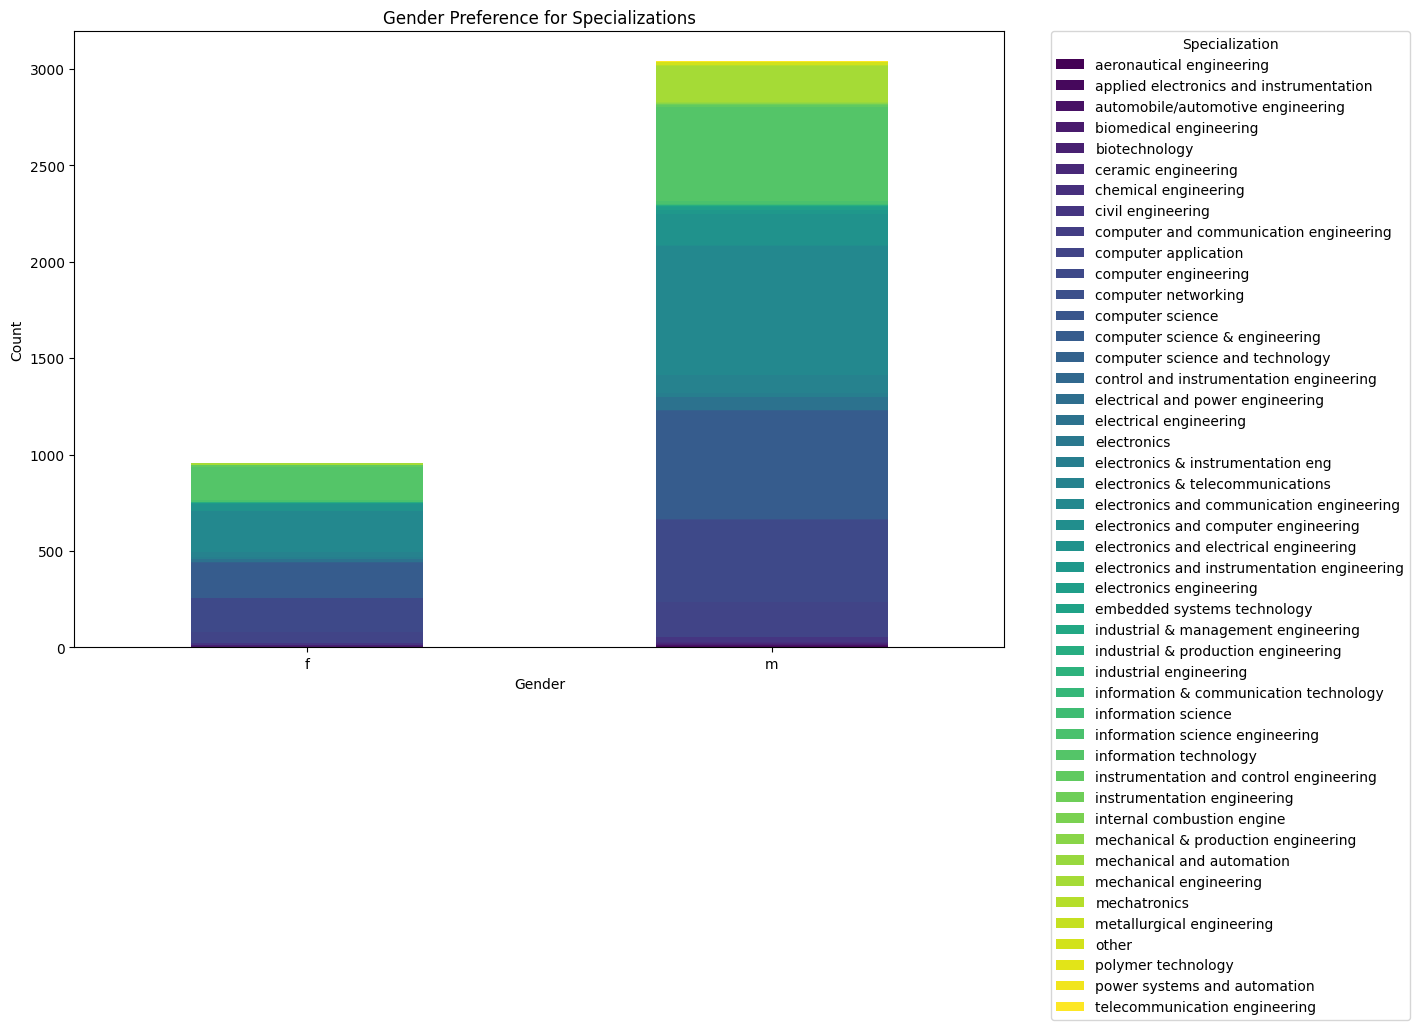

In [46]:
gender_specialization_crosstab = pd.crosstab(df['Gender'], df['Specialization'])
ax = gender_specialization_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Gender Preference for Specializations')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()